<a href="https://colab.research.google.com/github/oshritmau/coffee/blob/main/coffee_pro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.colors as mcolors
from dateutil import parser

# Import Scikit-learn for Machine Learning libraries
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.manifold import TSNE

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving arabica_data_cleaned.csv to arabica_data_cleaned.csv


In [ ]:
# Dataset is now stored in a Pandas Dataframe
import io
df = pd.read_csv(io.BytesIO(uploaded['arabica_data_cleaned.csv']))

In [ ]:
#fill missimg value (nan)
df = df.fillna(df.mode().iloc[0])

In [ ]:
# Handle duplicates
duplicate_rows_data = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)

number of duplicate rows:  (0, 44)


In [ ]:
# Loop through each column and count the number of distinct values
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

Unnamed: 0: 1311 distinct values
Species: 1 distinct values
Owner: 305 distinct values
Country.of.Origin: 36 distinct values
Farm.Name: 557 distinct values
Lot.Number: 221 distinct values
Mill: 447 distinct values
ICO.Number: 841 distinct values
Company: 270 distinct values
Altitude: 383 distinct values
Region: 343 distinct values
Producer: 675 distinct values
Number.of.Bags: 130 distinct values
Bag.Weight: 56 distinct values
In.Country.Partner: 27 distinct values
Harvest.Year: 46 distinct values
Grading.Date: 558 distinct values
Owner.1: 309 distinct values
Variety: 29 distinct values
Processing.Method: 5 distinct values
Aroma: 33 distinct values
Flavor: 35 distinct values
Aftertaste: 35 distinct values
Acidity: 31 distinct values
Body: 31 distinct values
Balance: 32 distinct values
Uniformity: 10 distinct values
Clean.Cup: 11 distinct values
Sweetness: 8 distinct values
Cupper.Points: 42 distinct values
Total.Cup.Points: 178 distinct values
Moisture: 23 distinct values
Category.One.D

In [ ]:
#check missing ratio
data_na = (df.isnull().sum() / len(df)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :data_na})
#missing_data.head(20)

In [ ]:
# Mapping the Education
processing_mapping = {
    "Double Anaerobic Washed": "Washed / Wet",
    "Semi Washed": "Washed / Wet",
    "Honey,Mossto": "Pulped natural / honey",
    "Double Carbonic Maceration / Natural": "Natural / Dry",
    "Wet Hulling": "Washed / Wet",
    "Anaerobico 1000h": "Washed / Wet",
    "SEMI-LAVADO": "Natural / Dry"
}
# Fixing the values in the column
df['Processing.Method'] = df['Processing.Method'].map(processing_mapping)
df['Processing.Method'].fillna("Washed / Wet", inplace=True)


In [ ]:
# # fixing the data in the cell
# df['Altitude']=df['Altitude'].replace('^meters.level:$', value='', regex=True)
# df['Altitude']=df['Altitude'].replace('m$', value='', regex=True)
# df['Altitude']=df['Altitude'].replace('-.*', value='', regex=True)

In [ ]:
pattern = r'^meters\.level:|-.*|m$'
df['Altitude'] = df['Altitude'].astype(str).str.replace(pattern, '', regex=True)

In [ ]:
# Define a function to clean and calculate the mean
def clean_altitude_range(range_value):
    if isinstance(range_value, str):
        range_value = range_value.replace(" ", "")  # Remove blank spaces
        if '-' in range_value:
            try:
                start, end = range_value.split('-')
                start = int(start)
                end = int(end)
                return (start + end) / 2
            except ValueError:
                return np.nan
        else:
            try:
                return int(range_value)
            except ValueError:
                return np.nan
    else:
        return range_value

# Apply the function to clean and calculate the mean for each value in the "Altitude" column
df['Altitude'] = df['Altitude'].apply(clean_altitude_range)

In [ ]:
# Extract the prior year from the "Harvest Year" column
df['Harvest.Year'] = df['Harvest.Year'].str.split('/').str[0].str.strip()

In [ ]:
not_year=[16,169,170,312,395,437,438,439,477,492,493,527,530,557,631,704,776,814,832,857,869,932,948,1036,1167,1191,1261]
for i in not_year:
  df=df.drop(i)

In [ ]:
#df.loc[df['Harvest.Year'] =='March 2010'] = '2010'

In [ ]:
#df.loc[df['Harvest.Year'] =='Sept 2009 - April 2010'] = '2009'

In [ ]:
#df.loc[df['Harvest.Year'] =='Fall 2009'] = '2009'

In [ ]:
#df.loc[df['Harvest.Year'] =='2010-2011'] = '2010'

In [ ]:
#df.loc[df['Harvest.Year'] =='January 2011'] = '2011'

In [ ]:
#df.loc[df['Harvest.Year'] =='Spring 2011 in Colombia.'] = '2011'

In [ ]:
#df.loc[df['Harvest.Year'] =='2009-2010'] = '2009'

In [ ]:
#df.loc[df['Harvest.Year'] =='23 July 2010'] = '2010'

In [ ]:
#df.loc[df['Harvest.Year'] =='December 2009-March 2010'] = '2009'

In [ ]:
#df.loc[df['Harvest.Year'] =='2009 - 2010'] = '2009'

In [ ]:
update_mapping = {
    'March 2010': '2010',
    'Sept 2009 - April 2010': '2009',
    'Fall 2009': '2009',
    '2010-2011': '2010',
    'January 2011': '2011',
    'Spring 2011 in Colombia.': '2011',
    '2009-2010': '2009',
    '23 July 2010': '2010',
    'December 2009-March 2010': '2009',
    '2009 - 2010': '2009'
}

df['Harvest.Year'] = df['Harvest.Year'].replace(update_mapping)

In [ ]:
pd.set_option('display.max_rows', df.shape[0]+1)

In [ ]:
df['Harvest.Year'].dropna()

In [ ]:
# Convert "Harvest Year" and "Expiration" columns to datetime objects using dateutil parser
df['Harvest.Year'] = pd.to_datetime(df['Harvest.Year'], format='%Y')
df['Expiration'] = df['Expiration'].apply(parser.parse)

In [ ]:
# Calculate the difference in days between "Expiration" and "Harvest Year" columns
df['Coffee Age'] = (df['Expiration'] - df['Harvest.Year']).dt.days

In [ ]:
columns_to_drop = ['ICO.Number','Owner','Region','Certification.Contact','Certification.Address','Farm.Name',"Lot.Number","Mill","ICO.Number","Producer",'Company','Expiration', 'Harvest.Year',
                   "Unnamed: 0",'Number.of.Bags','Bag.Weight','In.Country.Partner','Grading.Date','Variety','Uniformity','Clean.Cup','Sweetness','Certification.Body']
df.drop(columns_to_drop, axis=1, inplace=True)

In [ ]:
# List of numeric attributes
numeric_attributes = ['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Total.Cup.Points', 'Moisture']

# Create a subplot for each numeric attribute
fig = make_subplots(rows=len(numeric_attributes), cols=2)

# Add a histogram to the subplot for each numeric attribute
for i, attribute in enumerate(numeric_attributes):
    fig.add_trace(go.Histogram(x=df[attribute], nbinsx=25, name=attribute), row=i+1, col=1)

fig.update_layout(height=200*len(numeric_attributes), width=800, title_text="Histograms of Numeric Attributes")
fig.show()

In [ ]:
# df.drop(df.loc[df['Country.of.Origin']=='2009'].index, inplace=True)
# df.drop(df.loc[df['Country.of.Origin']=='2010'].index, inplace=True)
# df.drop(df.loc[df['Country.of.Origin']=='2011'].index, inplace=True)
#fixing

In [ ]:
#fixing
years_to_drop = ['2009', '2010', '2011']
df.drop(df[df['Country.of.Origin'].isin(years_to_drop)].index, inplace=True)

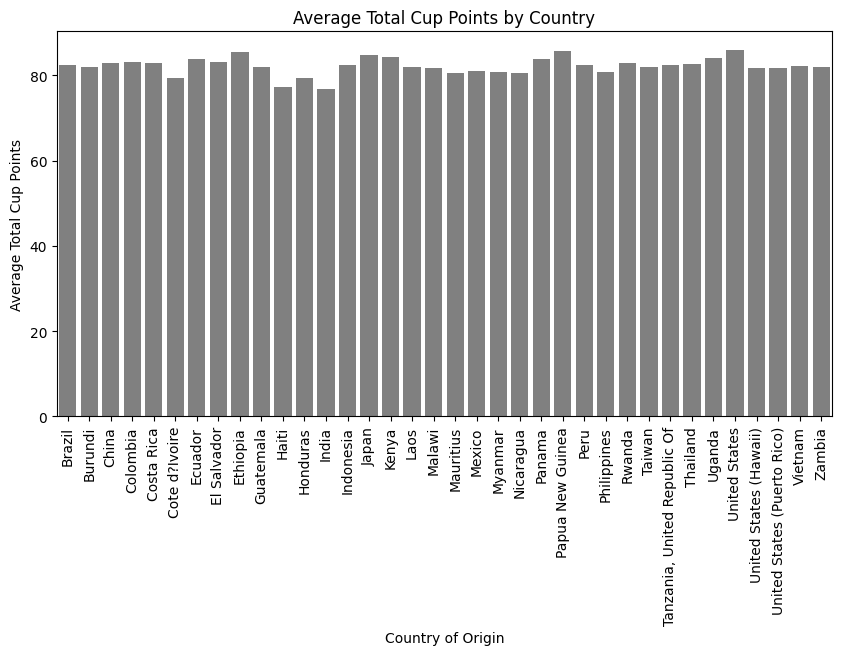

In [ ]:
# Group the data by country and calculate the mean of Total Cup Points
df_grouped = df.groupby('Country.of.Origin')['Total.Cup.Points'].mean().reset_index()

# Create a Choropleth map
fig = px.choropleth(df_grouped,
                    locations='Country.of.Origin',
                    locationmode='country names',
                    color='Total.Cup.Points',
                    hover_name='Country.of.Origin',
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title='Average Total Cup Points by Country')

fig.show()

# Create a bar plot with gray color
plt.figure(figsize=(10, 5))
sns.barplot(x=df_grouped['Country.of.Origin'], y=df_grouped['Total.Cup.Points'], color='gray')
plt.title('Average Total Cup Points by Country')
plt.xlabel('Country of Origin')
plt.ylabel('Average Total Cup Points')
plt.xticks(rotation=90)
plt.show()

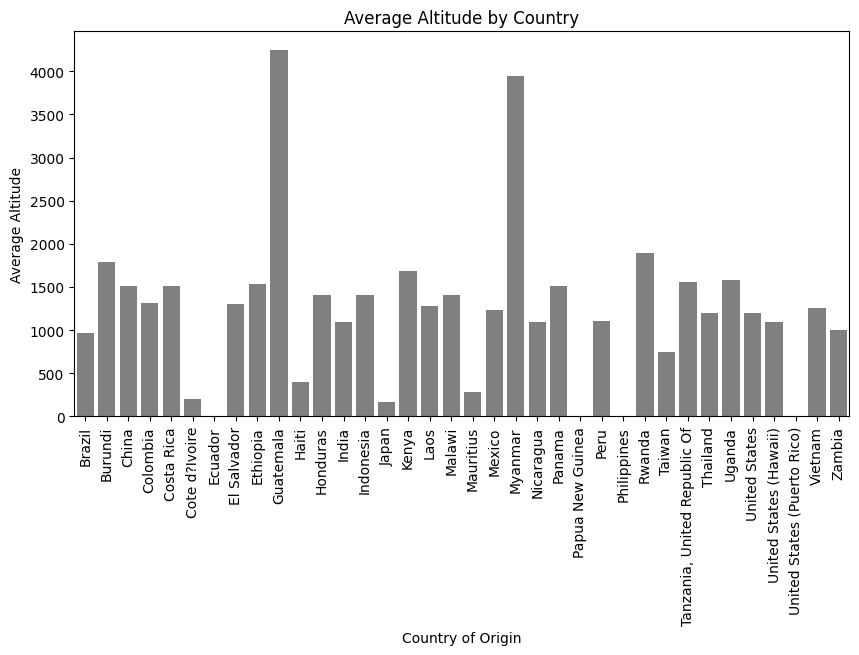

In [ ]:
# Group the data by country and calculate the mean of Altitude
df_grouped = df.groupby('Country.of.Origin')['Altitude'].mean().reset_index()

# Create a Choropleth map
fig = px.choropleth(df_grouped,
                    locations='Country.of.Origin',
                    locationmode='country names',
                    color='Altitude',
                    hover_name='Country.of.Origin',
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title='Average Altitude by Country')

fig.show()

# Create a bar plot with gray color
plt.figure(figsize=(10, 5))
sns.barplot(x=df_grouped['Country.of.Origin'], y=df_grouped['Altitude'], color='gray')
plt.title('Average Altitude by Country')
plt.xlabel('Country of Origin')
plt.ylabel('Average Altitude')
plt.xticks(rotation=90)
plt.show()

In [ ]:
data = df.copy()
categorical_columns = ['Processing.Method']
numerical_columns = ['Altitude', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance','Total.Cup.Points', 'Moisture', 'Quakers', 'Category.Two.Defects', 'Coffee Age']
columns_to_drop = ['Country.of.Origin', 'Color']
data.drop(columns_to_drop, axis=1, inplace=True)
dummy_variables = pd.get_dummies(data, columns=categorical_columns, drop_first=False)

In [ ]:
scaler = StandardScaler()

# Scale the numerical columns
scaled_numerical = scaler.fit_transform(data[numerical_columns])

# Convert the scaled numerical columns
scaled_numerical_df = pd.DataFrame(scaled_numerical, columns=numerical_columns)

In [ ]:
# Drop the original numerical columns
dummy_variables = dummy_variables.drop(numerical_columns, axis=1, inplace=True)

# Concatenate the dummy variables and scaled numerical columns
processed_df = pd.concat([dummy_variables, scaled_numerical_df],axis=1)

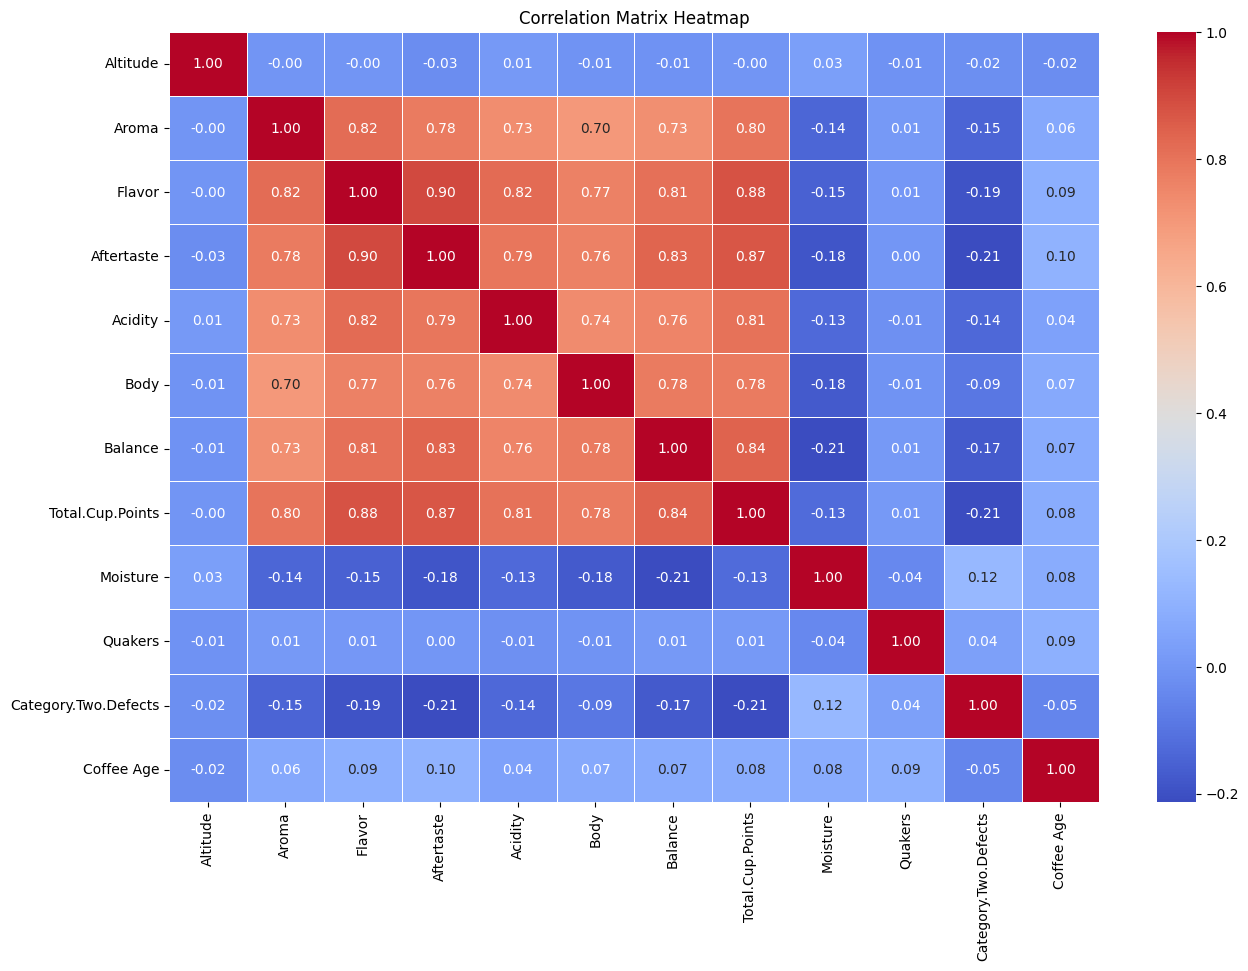

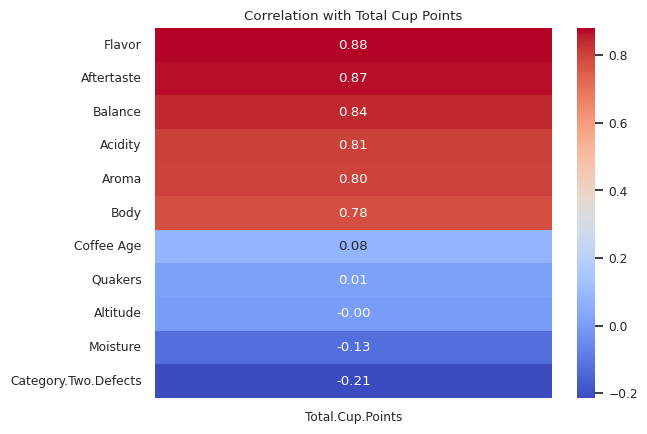

In [ ]:
correlation_matrix = processed_df.corr()

#Graph I.
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

corr = processed_df.corr()
target_corr = corr['Total.Cup.Points'].drop('Total.Cup.Points')

# Sort correlation values in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)

#Graph II
# Create a heatmap of the correlations with the target column
sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with Total Cup Points')
plt.show()

In [ ]:
import math
# Create a copy of the dataframe to not alter the original
df_preprocessed = df.copy()


# Preprocessing: Label encoding for categorical variables
le = LabelEncoder()
categorical_features = ['Country.of.Origin', 'Processing.Method', 'Color']
for feature in categorical_features:
    df[feature] = pd.to_numeric(df[feature],errors='coerce')
    df_preprocessed[feature] = le.fit_transform(df[feature])

# Preprocessing: MinMax scaling for numerical/ratio variables
mm = MinMaxScaler()
numerical_features = ['Altitude', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance','Total.Cup.Points', 'Moisture', 'Quakers', 'Category.Two.Defects', 'Coffee Age']

for col in df_preprocessed.columns:
  flag = False
  for i in numerical_features:
    if col == i:
      flag = True
      continue
  if not flag:
    df_preprocessed=df_preprocessed.drop(col, axis =1)
    #try it i chat gpt



for feature in numerical_features:
    df[feature] = df[feature].to_numpy()
    df_preprocessed[feature] = mm.fit_transform((df[feature]).values.reshape(-1,1))

# df_preprocessed['Altitude']=df_preprocessed['Altitude'].fillna(method="ffill")
# df_preprocessed['Quakers']=df_preprocessed['Quakers'].fillna(method="ffill")
# df_preprocessed['Coffee Age']=df_preprocessed['Coffee Age'].fillna(method="ffill")

columns_to_fill = ['Altitude', 'Quakers', 'Coffee Age']

for column in columns_to_fill:
    df_preprocessed[column] = df_preprocessed[column].fillna(method='ffill')

# Apply t-SNE with different perplexity and learning rate
tsne = TSNE(n_components=2, random_state=42, perplexity=50, learning_rate=200)
tsne_results = tsne.fit_transform(df_preprocessed)

# Plotly Interactive plot
df_tsne = pd.DataFrame(data = tsne_results, columns = ['Dim_1', 'Dim_2'])
df_tsne['Total.Cup.Points'] = ((df_preprocessed['Total.Cup.Points']).astype(float)).apply(lambda x: math.trunc(x*100))
fig = px.scatter(df_tsne, x='Dim_1', y='Dim_2', color='Total.Cup.Points', title='t-SNE plot colored by Total Cup Points')
fig.show()

In [ ]:
#Score Prediction
categorical_columns = ['Processing.Method','Country.of.Origin', 'Color']
numerical_columns = ['Altitude', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Total.Cup.Points', 'Moisture', 'Category.One.Defects', 'Quakers', 'Category.Two.Defects', 'Coffee Age']

# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), [col for col in numerical_columns if col != 'Total.Cup.Points']),
        ('cat', OneHotEncoder(), categorical_columns)])

# Append classifier to preprocessing pipeline.
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestRegressor(n_estimators=100, random_state=42))])



# Split the data into train and test sets
X = df.drop('Total.Cup.Points', axis=1)
y = df['Total.Cup.Points']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# X_train['Country.of.Origin'] = X_train['Country.of.Origin'].fillna("UNKNOWN")
# X_train['Processing.Method'] = X_train['Processing.Method'].fillna("UNKNOWN")
# X_train['Color'] = X_train['Color'].fillna("UNKNOWN")
# X_train['Altitude'] = X_train['Altitude'].fillna(X_train['Altitude'].mean())

# X_test['Country.of.Origin'] = X_test['Country.of.Origin'].fillna("UNKNOWN")
# X_test['Processing.Method'] = X_test['Processing.Method'].fillna("UNKNOWN")
# X_test['Color'] = X_test['Color'].fillna("UNKNOWN")
# X_test['Altitude'] = X_test['Altitude'].fillna(X_train['Altitude'].mean())

def fill_missing_values(df, columns, fill_values):
    for column, fill_value in zip(columns, fill_values):
        df[column] = df[column].fillna(fill_value)

fill_columns = ['Country.of.Origin', 'Processing.Method', 'Color']
fill_values = ['UNKNOWN', 'UNKNOWN', 'UNKNOWN']

mean_altitude = X_train['Altitude'].mean()
fill_columns.append('Altitude')
fill_values.append(mean_altitude)

fill_missing_values(X_train, fill_columns, fill_values)
fill_missing_values(X_test, fill_columns, fill_values)


# Train the model

clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)#

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 1.6906142745136192


In [ ]:
# COPY -Score Prediction - tring to nake a better resilt
copy_numerical_columns = [ 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Total.Cup.Points', 'Moisture', 'Category.One.Defects', 'Quakers', 'Category.Two.Defects', 'Coffee Age']

# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), [col for col in copy_numerical_columns if col != 'Total.Cup.Points'])])

# Append classifier to preprocessing pipeline.
copy_clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestRegressor(n_estimators=100, random_state=42))])



# Split the data into train and test sets
cX = df.drop('Total.Cup.Points', axis=1)
cy = df['Total.Cup.Points']
cX_train, cX_test, cy_train, cy_test = train_test_split(cX, cy, test_size=0.2, random_state=42)

In [ ]:
# Train the model with the copy
copy_clf.fit(cX_train, cy_train)

# Predict on the test set
cy_pred = copy_clf.predict(cX_test)

# Evaluate the model
mseCopy = mean_squared_error(cy_test, cy_pred)
print('Mean Squared Error:', mseCopy)

Mean Squared Error: 1.698813135556407


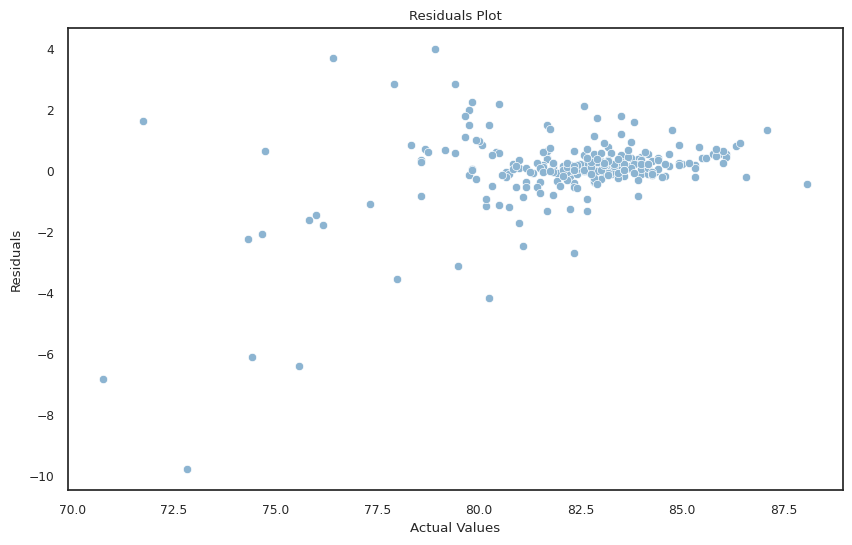

In [ ]:
# Plot residuals
plt.figure(figsize=(10, 6))
residuals = y_test - y_pred
sns.scatterplot(x=y_test, y=residuals)
plt.title('Residuals Plot')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.show()

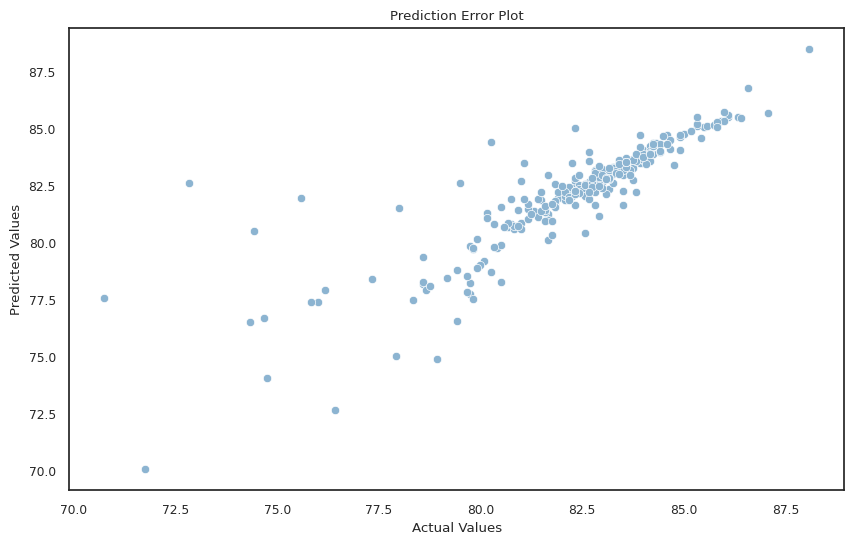

In [ ]:
# Plot prediction error
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.title('Prediction Error Plot')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()